In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# Point to the data
Data is expected to be in a folder YYYYMMDD with 24 hourly files named HH.csv

In [3]:
# The absolute path to the folder containing the data files
# I have chosen the folder that has the files for 20230901-- Sept 1, 2023
# NOTE This assumes the csv files are unzipped
data_folder = "/Volumes/Seagate/misc/historical_data/20230901"

# Get a list of all the files in the folder and sort them
# Later there is an option to remove all these files, so be aware if you decide to use that option 
files = glob.glob(data_folder + "/*.csv")
files.sort()

# Sanity check-- there should be 24 files in the folder
print("There are " + str(len(files)) + " files in the folder:")
print(files)

There are 24 files in the folder:
['/Volumes/Seagate/misc/historical_data/20230901/00.csv', '/Volumes/Seagate/misc/historical_data/20230901/01.csv', '/Volumes/Seagate/misc/historical_data/20230901/02.csv', '/Volumes/Seagate/misc/historical_data/20230901/03.csv', '/Volumes/Seagate/misc/historical_data/20230901/04.csv', '/Volumes/Seagate/misc/historical_data/20230901/05.csv', '/Volumes/Seagate/misc/historical_data/20230901/06.csv', '/Volumes/Seagate/misc/historical_data/20230901/07.csv', '/Volumes/Seagate/misc/historical_data/20230901/08.csv', '/Volumes/Seagate/misc/historical_data/20230901/09.csv', '/Volumes/Seagate/misc/historical_data/20230901/10.csv', '/Volumes/Seagate/misc/historical_data/20230901/11.csv', '/Volumes/Seagate/misc/historical_data/20230901/12.csv', '/Volumes/Seagate/misc/historical_data/20230901/13.csv', '/Volumes/Seagate/misc/historical_data/20230901/14.csv', '/Volumes/Seagate/misc/historical_data/20230901/15.csv', '/Volumes/Seagate/misc/historical_data/20230901/16.cs

# Trim the data

In [46]:
# Columns we want to keep
cols_to_keep = ["detecttime", 'hash', "status", 'region', 'curblocknumber', 'blockspending', 'timepending', 'gas']

# Set the region 
region_to_keep = "us-east-1"

In [50]:
def trim_data(files, cols, region =  "us-east-1"):
    # if the folder data_folder/"trimmed_data" doesn't exist, create it    
    destination_folder = os.path.join(data_folder, "trimmed_data")

    if not os.path.exists(destination_folder):
        os.makedirs(os.path.join(destination_folder))

    # Loop through all the csv files
    # Get the cols and rows we want, and save  to a new file (file is small)
    for i in range(len(files)):
        file = files[i]
        df = pd.read_csv(file, sep='\t')

        df = df[cols]
        df = df[df['region'] == region]
        
        file_name = "trimmed_" + str(i) + ".csv"
        df.to_csv(os.path.join(destination_folder, file_name), index=False)

        print("Finished cleaning file " + str(i+1) + " of " + str(len(files)) + " files.")
        del df
        
    return

def combine_hours(remove_csv = False):

    destination_folder = os.path.join(data_folder, "trimmed_data")

    first_file = os.path.join(destination_folder, "trimmed_0.csv")
    df = pd.read_csv(first_file)

    print("Finished loading file 1.") 

    for i in range(1, 24):
        file = os.path.join(destination_folder, "trimmed_" + str(i) + ".csv")

        df2 = pd.read_csv(file)
        df = pd.concat([df, df2], ignore_index=True)

        print("Finished appending file " + str(i+1) + " of 24 files.")  
        del df2

    print("Writing to trimmed_day.csv")
    df.to_csv(os.path.join(destination_folder, "trimmed_day.csv"))

    if remove_csv:
        for file in files:
            os.remove(file)
            
    return 

In [49]:
# Trim the data, # ignore DtypeWarning
trim_data(files, cols_to_keep, region_to_keep)

Finished cleaning file 1 of 24 files.
Finished cleaning file 2 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 3 of 24 files.
Finished cleaning file 4 of 24 files.
Finished cleaning file 5 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 6 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (8,9,10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 7 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 8 of 24 files.
Finished cleaning file 9 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 10 of 24 files.
Finished cleaning file 11 of 24 files.
Finished cleaning file 12 of 24 files.
Finished cleaning file 13 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 14 of 24 files.
Finished cleaning file 15 of 24 files.
Finished cleaning file 16 of 24 files.
Finished cleaning file 17 of 24 files.
Finished cleaning file 18 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 19 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 20 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 21 of 24 files.
Finished cleaning file 22 of 24 files.
Finished cleaning file 23 of 24 files.


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_69349/601842746.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


Finished cleaning file 24 of 24 files.


In [4]:
# in the next step, you will have an option to remove the original files. 
# Make sure there are only the hourly csv files in this list before you set remove_csv to True
for file in files:
    print(file)

/Volumes/Seagate/misc/historical_data/20230901/00.csv
/Volumes/Seagate/misc/historical_data/20230901/01.csv
/Volumes/Seagate/misc/historical_data/20230901/02.csv
/Volumes/Seagate/misc/historical_data/20230901/03.csv
/Volumes/Seagate/misc/historical_data/20230901/04.csv
/Volumes/Seagate/misc/historical_data/20230901/05.csv
/Volumes/Seagate/misc/historical_data/20230901/06.csv
/Volumes/Seagate/misc/historical_data/20230901/07.csv
/Volumes/Seagate/misc/historical_data/20230901/08.csv
/Volumes/Seagate/misc/historical_data/20230901/09.csv
/Volumes/Seagate/misc/historical_data/20230901/10.csv
/Volumes/Seagate/misc/historical_data/20230901/11.csv
/Volumes/Seagate/misc/historical_data/20230901/12.csv
/Volumes/Seagate/misc/historical_data/20230901/13.csv
/Volumes/Seagate/misc/historical_data/20230901/14.csv
/Volumes/Seagate/misc/historical_data/20230901/15.csv
/Volumes/Seagate/misc/historical_data/20230901/16.csv
/Volumes/Seagate/misc/historical_data/20230901/17.csv
/Volumes/Seagate/misc/histor

In [51]:
# Combine the trimmed hourly files into one file

# WARNING remove_csv = True will delete ALL files stored in the list of files printed in the previous cell after combining the data. 
# Set remove_csv = False (or pass no arguments) if you are unsure or would prefer to do this manually.
 
# combine_hours() # with no arguments will not delete the hourly files 
# combine_hours(remove_csv = True) # will delete the hourly files
combine_hours(remove_csv = False) 

Finished appending file 2 of 24 files.
Finished appending file 3 of 24 files.
Finished appending file 4 of 24 files.
Finished appending file 5 of 24 files.
Finished appending file 6 of 24 files.
Finished appending file 7 of 24 files.
Finished appending file 8 of 24 files.
Finished appending file 9 of 24 files.
Finished appending file 10 of 24 files.
Finished appending file 11 of 24 files.
Finished appending file 12 of 24 files.
Finished appending file 13 of 24 files.
Finished appending file 14 of 24 files.
Finished appending file 15 of 24 files.
Finished appending file 16 of 24 files.
Finished appending file 17 of 24 files.
Finished appending file 18 of 24 files.
Finished appending file 19 of 24 files.
Finished appending file 20 of 24 files.
Finished appending file 21 of 24 files.
Finished appending file 22 of 24 files.
Finished appending file 23 of 24 files.
Finished appending file 24 of 24 files.


# Load in the trimmed day csv

In [5]:
trimmed_data = os.path.join(data_folder, "trimmed_data", "trimmed_day.csv")
df = pd.read_csv(trimmed_data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536445 entries, 0 to 3536444
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   detecttime      object 
 2   hash            object 
 3   status          object 
 4   region          object 
 5   curblocknumber  int64  
 6   blockspending   float64
 7   timepending     float64
 8   gas             float64
dtypes: float64(3), int64(2), object(4)
memory usage: 242.8+ MB
None


In [6]:
print(df['detecttime'].head())
print(df['detecttime'].tail())

0    2023-09-01T00:00:00.012Z
1    2023-09-01T00:00:00.021Z
2    2023-09-01T00:00:00.034Z
3    2023-09-01T00:00:00.124Z
4    2023-09-01T00:00:00.136Z
Name: detecttime, dtype: object
3536440    2023-09-01T23:59:59.653Z
3536441    2023-09-01T23:59:59.670Z
3536442    2023-09-01T23:59:59.720Z
3536443    2023-09-01T23:59:59.724Z
3536444    2023-09-01T23:59:59.729Z
Name: detecttime, dtype: object


In [7]:
# Sanity check
# Check if df['detecttime'] sorted
print("Is detecttime monotonic increasing (sorted)? ",df['detecttime'].is_monotonic_increasing)

Is detecttime monotonic increasing (sorted)?  True


## Bonus graph?

In [32]:
# create df_finalized where status == confirmed or failed
df_finalized = df[(df['status'] == 'confirmed') | (df['status'] == 'failed')]

confirmed_median = df_finalized[df_finalized['status'] == 'confirmed']['timepending'].median()
failed_median = df_finalized[df_finalized['status'] == 'failed']['timepending'].median()

print("Confirmed median:", confirmed_median)
print("Failed median:", failed_median)

Confirmed median: 7968.5
Failed median: 8243.5


/Users/tara/opt/anaconda3/envs/camcos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


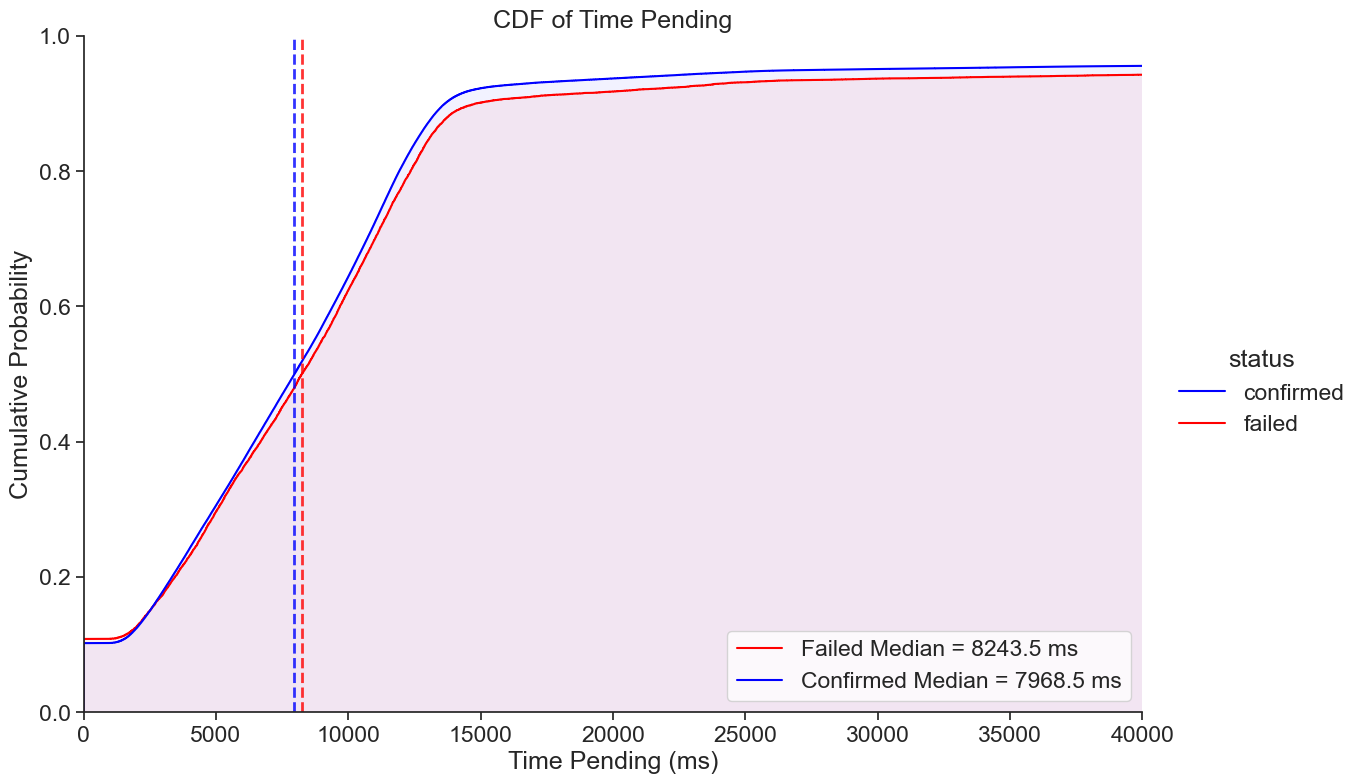

In [31]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('dark')
sns.set(font_scale=1.5)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

g = sns.displot(df_finalized, x="timepending", kind="ecdf", hue="status", palette={"confirmed": "blue", "failed": "red"}, height=8, aspect=1.5)

# Add the median lines
plt.axvline(confirmed_median, color='blue', alpha=0.8, linestyle='dashed', linewidth=2)
plt.axvline(failed_median, color='red', alpha=0.8, linestyle='dashed', linewidth=2)

# Add shading under the graph
plt.fill_between(g.ax.lines[0].get_xdata(), g.ax.lines[0].get_ydata(), color='red', alpha=0.05)
plt.fill_between(g.ax.lines[1].get_xdata(), g.ax.lines[1].get_ydata(), color='blue', alpha=0.05)

# Add median values to legend
plt.legend(['Failed Median = ' + str(failed_median) + ' ms', 'Confirmed Median = ' + str(confirmed_median) + ' ms'])

plt.xlabel("Time Pending (ms)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Time Pending")

# Set x axis limits to 40000
plt.xlim(0, 40000)
plt.show()
